<a href="https://www.kaggle.com/code/renadhassan/stopsignmodel?scriptVersionId=184057226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This section imports all the necessary libraries like pandas, numpy, tensorflow, etc.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import load_img, img_to_array
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras._tf_keras.keras.optimizers import Adam

2024-06-17 19:39:33.955674: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 19:39:33.955883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 19:39:34.154996: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing import image

This section loads and displays 5 sample images (with stop signs).

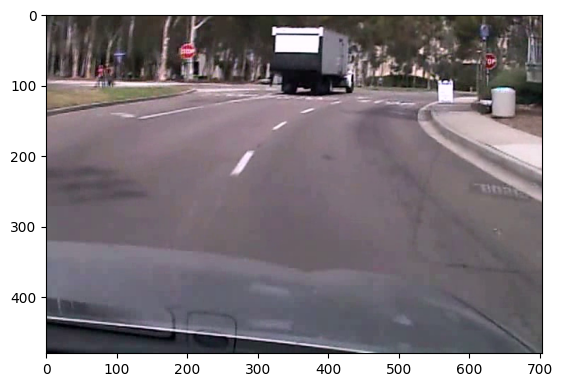

In [4]:
S1 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_001.png')
S1 = cv2.cvtColor(S1,cv2.COLOR_BGR2RGB)
plt.imshow(S1)

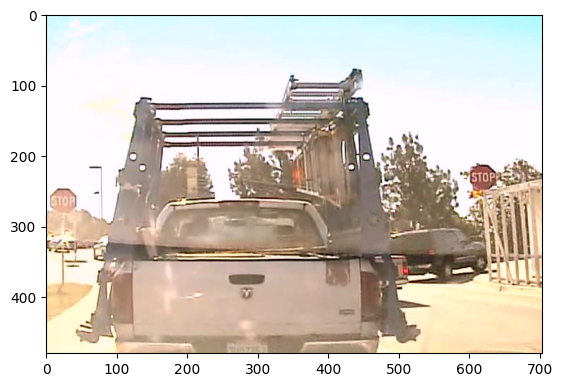

In [5]:
S2 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_002.png')
S2 = cv2.cvtColor(S2,cv2.COLOR_BGR2RGB)
plt.imshow(S2)

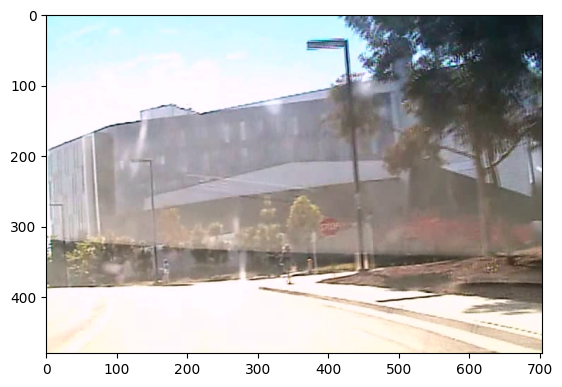

In [6]:
S3 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_003.png')
S3 = cv2.cvtColor(S3,cv2.COLOR_BGR2RGB)
plt.imshow(S3)

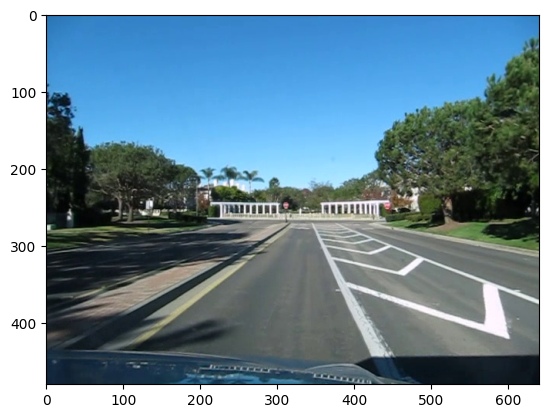

In [7]:
S4 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_004.png')
S4 = cv2.cvtColor(S4,cv2.COLOR_BGR2RGB)
plt.imshow(S4)

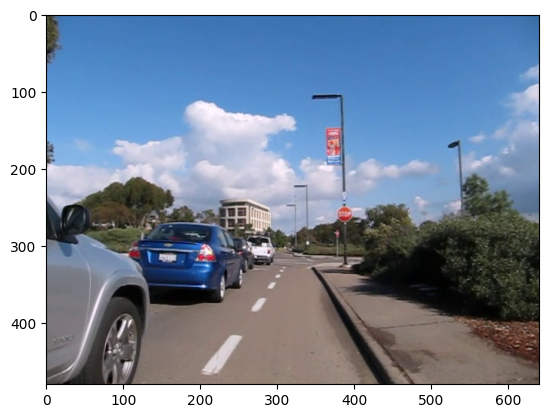

In [8]:
S5 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_005.png')
S5 = cv2.cvtColor(S5,cv2.COLOR_BGR2RGB)
plt.imshow(S5)

This section loads and displays 5 sample images (without stop signs).

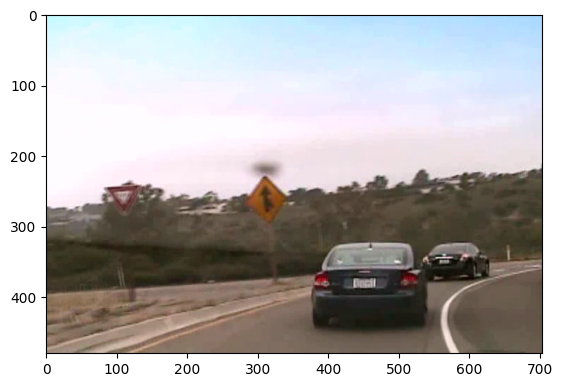

In [9]:
NS1 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_211.png')
NS1 = cv2.cvtColor(NS1,cv2.COLOR_BGR2RGB)
plt.imshow(NS1)

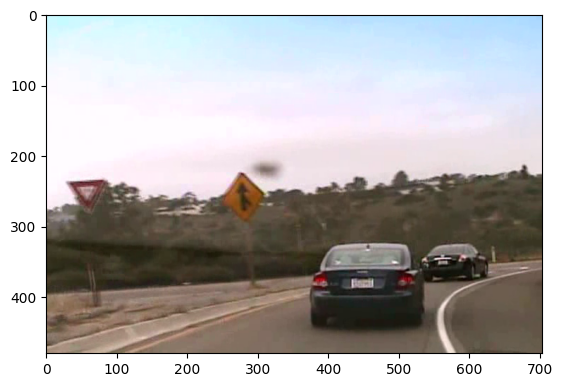

In [10]:
NS2 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_212.png')
NS2 = cv2.cvtColor(NS2,cv2.COLOR_BGR2RGB)
plt.imshow(NS2)

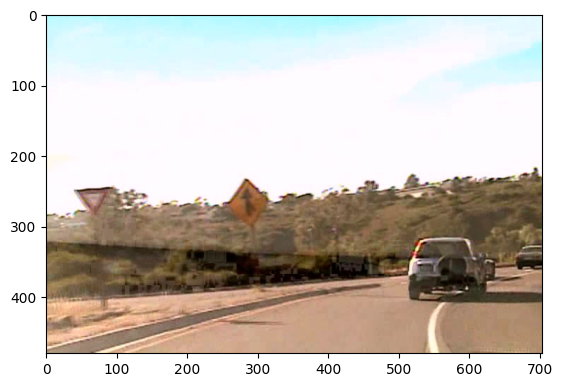

In [11]:
NS3 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_213.png')
NS3 = cv2.cvtColor(NS3,cv2.COLOR_BGR2RGB)
plt.imshow(NS3)

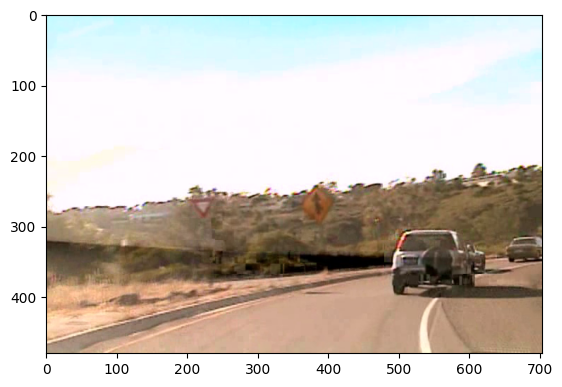

In [12]:
NS4 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_220.png')
NS4 = cv2.cvtColor(NS4,cv2.COLOR_BGR2RGB)
plt.imshow(NS4)

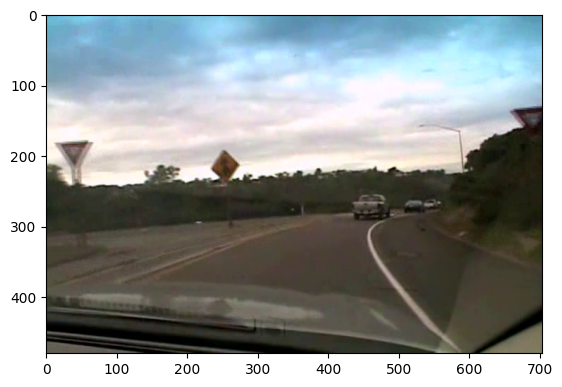

In [13]:
NS5 = cv2.imread('/kaggle/input/tiny-lisa-traffic-sign-detection-dataset/db_lisa_tiny/sample_240.png')
NS5 = cv2.cvtColor(NS5,cv2.COLOR_BGR2RGB)
plt.imshow(NS5)

This section defines data augmentation parameters for randomly transforming images.

In [14]:
image_gen = ImageDataGenerator(rotation_range=5, # rotate the image 5 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 10%
                               height_shift_range=0.2, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalizing it.
                               shear_range=0.02, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.02, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

This section applies data augmentation to a sample image (with and without a stop sign).

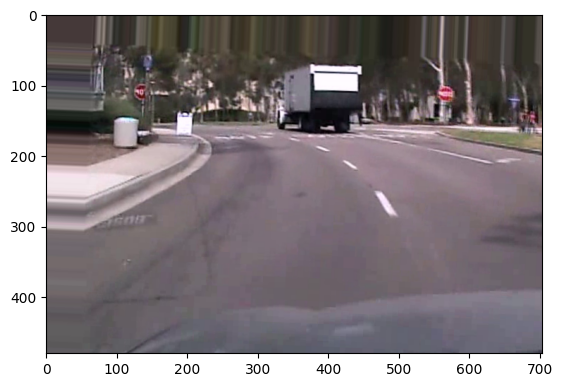

In [15]:
plt.imshow(image_gen.random_transform(S1))

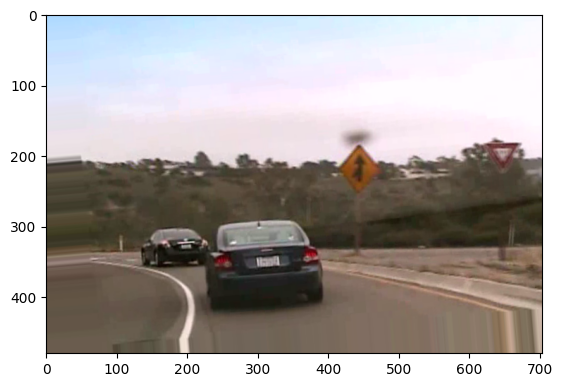

In [16]:
plt.imshow(image_gen.random_transform(NS1))

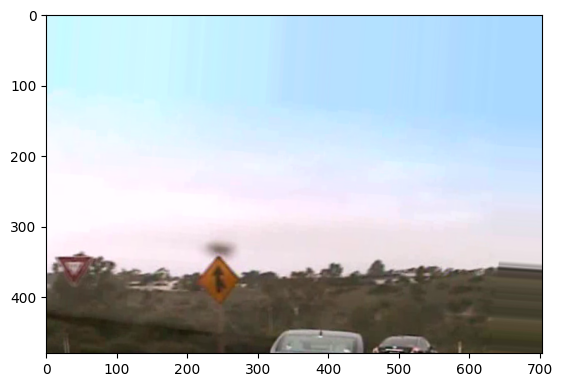

In [17]:

plt.imshow(image_gen.random_transform(NS1))

This section prints the shapes of a sample image (with and without a stop sign).

In [18]:
print('image shapes. ',S1.shape,' no sign: ',NS1.shape)

image shapes.  (480, 704, 3)  no sign:  (480, 704, 3)


 This section defines the path to the training data directory.

In [19]:
source_dir = '/kaggle/input/sorns-mine/Train'
image_gen.flow_from_directory(source_dir) #

Found 147 images belonging to 2 classes.


This section defines the width, height, and number of channels for the images.

In [20]:
# width,height,channels
image_shape = (150,150,3)

# **Creating the Model**

In [21]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.optimizers import Adam

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

**Preparing Training Data**

In [24]:
batch_size = 10
train_set = '/kaggle/input/sorns-mine/Train'
train_image_gen = image_gen.flow_from_directory(train_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 147 images belonging to 2 classes.


**Preparing Testing Data**

In [25]:
test_set = '/kaggle/input/sorns-mine/Test'
test_image_gen = image_gen.flow_from_directory(test_set,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 53 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'NoSign': 0, 'Sign': 1}

***Suppress Warnings***

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
epochs = 50

In [29]:
results = model.fit(train_image_gen, 
                   epochs=epochs,
                   steps_per_epoch=10,
                   validation_data=test_image_gen,
                   validation_steps=10)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 513ms/step - accuracy: 0.5333 - loss: 0.8575 - val_accuracy: 0.4528 - val_loss: 0.7015
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.6778 - loss: 0.6543 - val_accuracy: 0.4717 - val_loss: 0.8346
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.6445 - loss: 0.6355 - val_accuracy: 0.4717 - val_loss: 0.7532
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.6463 - loss: 0.6494 - val_accuracy: 0.4717 - val_loss: 0.7765
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.6904 - loss: 0.6051 - val_accuracy: 0.4528 - val_loss: 0.7025
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.7490 - loss: 0.6454 - val_accuracy: 0.4717 - val_loss: 0.7597
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.6543 - loss: 0.6326 - val_accuracy: 0.4717 - val_loss: 0.8382
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.6393 - loss: 0.6378 - val_accuracy: 0

In [30]:
model.save('stop_sign_classifier.h5')

# **Evaluating the Model**

In [31]:
results.history['accuracy'][epochs-1] # ending accuracy

0.699999988079071

*The below section plots the training accuracy of the model across epochs.*

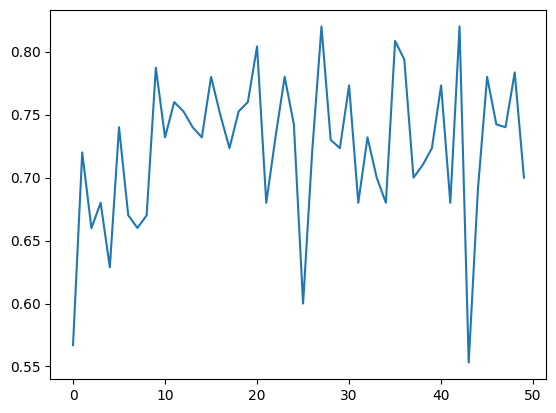

In [32]:
plt.plot(results.history['accuracy'])


# Predicting on new images

In [33]:
train_image_gen.class_indices

{'NoSign': 0, 'Sign': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Probability that image is a stop sign is: [[0.63550204]] 


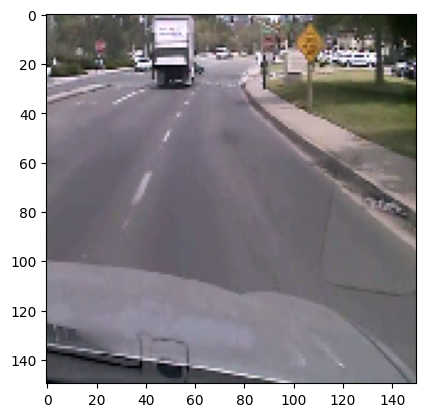

In [34]:
vehicle_file = '/kaggle/input/sorns-mine/Train/NoSign/sample_020.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probability that image is a stop sign is: [[0.6415459]] 


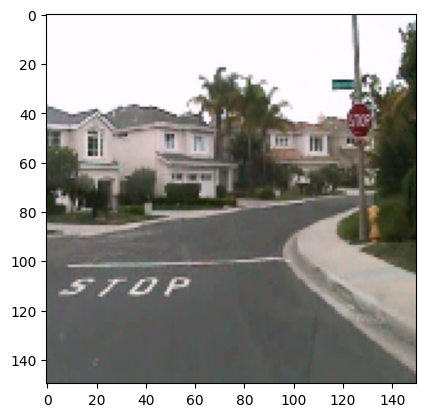

In [35]:
vehicle_file = '/kaggle/input/sorns-mine/Train/Sign/sample_115.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability that image is a stop sign is: [[0.74232537]] 


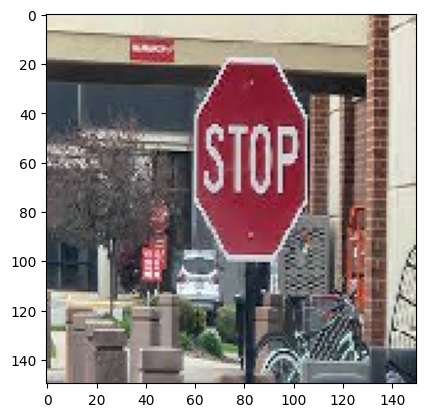

In [36]:
vehicle_file = '/kaggle/input/sorns-mine/Test/Stop/images.jpeg'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability that image is a stop sign is: [[0.45863822]] 


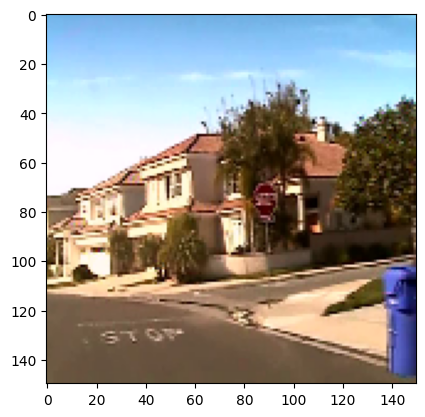

In [37]:
vehicle_file = '/kaggle/input/sorns-mine/Test/Stop/sample_122.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probability that image is a stop sign is: [[0.47908765]] 


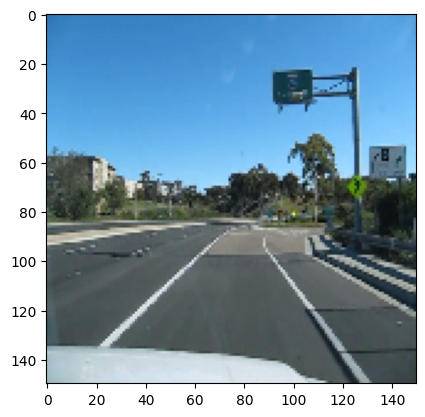

In [38]:
vehicle_file = '/kaggle/input/sorns-mine/Test/NoStop/sample_535.png'
v_img = image.load_img(vehicle_file, target_size=(150, 150))
plt.imshow(v_img)
v_img = image.img_to_array(v_img)
v_img = np.expand_dims(v_img, axis=0)
v_img = v_img/255
prediction_prob = model.predict(v_img)
print(f'Probability that image is a stop sign is: {prediction_prob} ')